In [220]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [221]:
def plotVectors3d(xs,yz,zs,os=0,col='b'):    
    if(xs.shape != ys.shape and xs.shape != zs.shape):
        return False    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.quiver(os[:,0],os[:,1],os[:,2],xs,ys,zs,arrow_length_ratio=0.1,color=col)
    mx = np.max([xs,ys,zs])
    ax.set_xlim([-mx, mx])
    ax.set_ylim([-mx, mx])
    #ax.view_init(elev=90, azim=90)
    plt.show()
    
def plotVectors2d(x,y,v,col='b',vorigin=np.inf,scale=1.1):    
    xs = np.array([x[0],y[0],v[0]])
    ys = np.array([x[1],y[1],v[1]])
    os = np.array([[0,0],[0,0],[x[0],x[1]]])    
    if (vorigin!=np.inf):
        os = np.array([[0,0],[0,0],[vorigin[0],vorigin[1]]])
    
    plt.figure()
    ax = plt.gca()
    ax.quiver(os[:,0],os[:,1],xs,ys, angles='xy', scale_units='xy', scale=1,color=col)
    mx = np.max([x,y,v])*scale
    ax.set_xlim([-mx, mx])
    ax.set_ylim([-mx, mx])
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)
    plt.show()

**What is a vector?**

An one-dimensional array of n numbers is a vector of size n.

$$
x = \begin{pmatrix}x_{0} \\ x_{1} \\ ... \\ x_{n-1}\end{pmatrix}
$$

For example, a vector of size 4 can be defined as:
$$
\begin{pmatrix}5 \\ 9 \\ 5 \\ 7\end{pmatrix}
$$

A vector is an *ordered array*. The position of elements is important.

A item in a vector can be referred to as the *i*th element or component, where *i* denotes the *n*th element in the vector.

**Direction...**

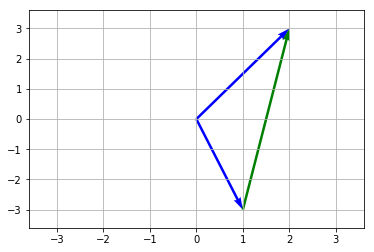

array([1, 6])

In [227]:
def dirTo(x,y):
    if(x.shape[0] != y.shape[0]):return False
    xy=zip(x,y)
    return np.array([y-x for x,y in xy])

x=np.array([1,-3])
y=np.array([2,3])
v = dirTo(x,y)

plotVectors2d(x,y,v,['b','b','g'],np.inf,0.6)
v

**Vector length, Euclidean length, vector magnitude**

$$
l = \sqrt{x_{0}^{2}+x_{1}^{2}+x_{2}^{2}+...+x_{n-1}^{2}}
$$

e.g.
Define x as:
$$
x = \begin{pmatrix}5 \\ 9 \\ 5 \\ 7\end{pmatrix}
$$

The length of x is defined as:
$$
l(x) = \sqrt{5^{2}+9^{2}+5^{2}+4^{2}}
$$

In [187]:
x = np.array([5,9,5,7])

def length(v):
    # vector  = x ^ 2
    vPow = np.power(v,2)
    # Sum all the elements in the vector
    vSum = np.sum(vPow)
    # Square root of the sum
    vSqurt = np.sqrt(vSum)
    return vSqurt

length(x)

13.416407864998739

**Unit basis vectors**

An important set of vectors is the set of unit basis vectors

$$
x_{j} = \begin{pmatrix}0 \\ 0 \\ 1 \\ 0 \\ 0\end{pmatrix}
$$

The j represents the position of 1 in a vector of size n, in the above example j = 2, n = 5.

$$
x_{0} = \begin{pmatrix}1 \\ 0 \\ 0 \\ 0 \\ 0\end{pmatrix}, x_{1} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \\ 0\end{pmatrix},  x_{n-1} = \begin{pmatrix}0 \\ 0 \\ 0 \\ 0 \\ 1\end{pmatrix}
$$



In [188]:
j = 2
n = 5

def makeUnitBasisVector(j,n):
    return np.array([1 if (x is j) else 0 for x in range(0,n)])

makeUnitBasisVector(j,n)

array([0, 0, 1, 0, 0])

**Equality (=)**

A vector is equal to another vector if and only if all of the elements in the vector are equal

$$
x = \begin{pmatrix}x_{0} \\x_{1} \\x_{2} \\... \\x_{n-1}\end{pmatrix}, y = \begin{pmatrix}y_{0} \\y_{1} \\y_{2} \\... \\y_{n-1}\end{pmatrix}, (x=y) = \begin{pmatrix}x_{0}=y_{0} \\x_{1}=y_{1} \\x_{2}=y_{2} \\... \\x_{n-1}=y_{n-1}\end{pmatrix}
$$

In [189]:
x = np.array([5,9,5,7])
y = np.array([5,1,4,1])
y1 = np.array([5,9,5,7])

def equal(x,y):
    if(x.shape[0] != y.shape[0]):return False
    for i in range(0, x.shape[0]):
        if(x[i]!=y[i]):return False
    return True

    
equal(x,y1)

True

**Assignment (:=) / copy**

The assignment or copy operation assigns the content of one vector to another vector. In our mathematical notation, we will denote this by the symbol **:=** (pronounce:becomes). After the assignment, the two vectors are equal to each other.



**Vector addition**

$$
x = \begin{pmatrix}x_{0} \\x_{1} \\x_{2} \\... \\x_{n-1}\end{pmatrix}, y = \begin{pmatrix}y_{0} \\y_{1} \\y_{2} \\... \\y_{n-1}\end{pmatrix}, x + y = \begin{pmatrix}x_{0}+y_{0} \\x_{1}+y_{1} \\x_{2}+y_{2} \\... \\x_{n-1}+y_{n-1}\end{pmatrix}
$$

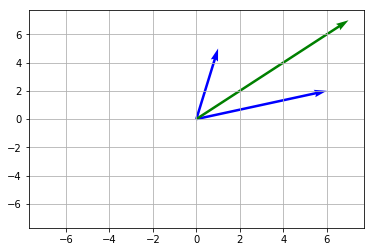

array([7, 7])

In [190]:
def Add(x,y):
    if(x.shape[0] != y.shape[0]):return False
    xy=zip(x,y)
    return np.array([x+y for x,y in xy])

x=np.array([1,5])
y=np.array([6,2])
v = Add(x,y)   
plotVectors2d(x,y,v,['b','b','g'],[0,0])
v

**Scaling**


$$
x = \begin{pmatrix}x_{0} \\x_{1} \\x_{2} \\... \\x_{n-1}\end{pmatrix}, a = 2, ax = \begin{pmatrix}a.x_{0} \\a.x_{1} \\a.x_{2} \\... \\a.x_{n-1}\end{pmatrix}
$$

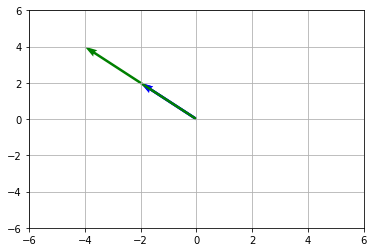

array([-4,  4])

In [192]:
x=np.array([-2,2])
a = 2

def Scale(x,a):
    return np.array([a*p for p in x])

v = Scale(x,a)
plotVectors2d(x,x,v,['b','b','g'],[0,0],1.5)
v

**Vector Subtraction**

$$
x = \begin{pmatrix}x_{0} \\x_{1} \\x_{2} \\... \\x_{n-1}\end{pmatrix}, y = \begin{pmatrix}y_{0} \\y_{1} \\y_{2} \\... \\y_{n-1}\end{pmatrix}, x - y = \begin{pmatrix}x_{0}-y_{0} \\x_{1}-y_{1} \\x_{2}-y_{2} \\... \\x_{n-1}-y_{n-1}\end{pmatrix}
$$


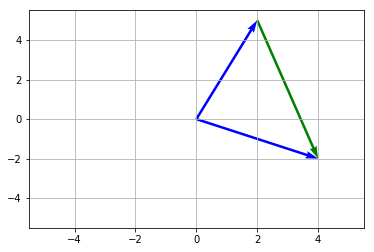

array([ 2, -7])

In [193]:
x=np.array([4,-2])
y=np.array([2,5])


def Subtract(x,y):
    if(x.shape[0] != y.shape[0]):return False
    xy=zip(x,y)
    return np.array([x-y for x,y in xy])

v = Subtract(x,y)   
plotVectors2d(x,y,v,['b','b','g'],list(y))
v

**Scaled Vector Addition (AXPY)**

It is often referred to as the AXPY operation, which stands for alpha (a) times x plus y. 

$$
x = \begin{pmatrix}x_{0} \\x_{1} \\x_{2} \\... \\x_{n-1}\end{pmatrix}, y = \begin{pmatrix}y_{0} \\y_{1} \\y_{2} \\... \\y_{n-1}\end{pmatrix}, a = 2, ax + y = \begin{pmatrix}a.x_{0}+y_{0} \\a.x_{1}+y_{1} \\a.x_{2}+y_{2} \\... \\a.x_{n-1}+y_{n-1}\end{pmatrix}
$$

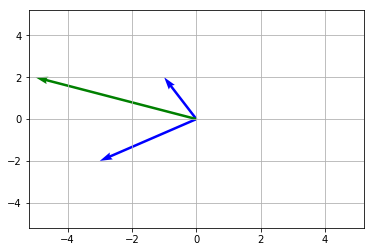

array([-5,  2])

In [197]:
x=np.array([-1,2])
a = 2
y=np.array([-3,-2])


def AXPY(x,a,y):
    if(x.shape[0] != y.shape[0]):return False
    xy=zip(x,y)
    return np.array([(a*x)+y for x,y in xy])

v = AXPY(x,a,y)   
plotVectors2d(x,y,v,['b','b','g'],[0,0],2.6)
v

**Linear Combinations of Vectors**

$$
x = \begin{pmatrix}x_{0} \\x_{1} \\x_{2} \\... \\x_{n-1}\end{pmatrix}, y = \begin{pmatrix}y_{0} \\y_{1} \\y_{2} \\... \\y_{n-1}\end{pmatrix}, a = 2,b = 2, ax + by = \begin{pmatrix}a.x_{0}+b.y_{0} \\a.x_{1}+b.y_{1} \\a.x_{2}+b.y_{2} \\... \\a.x_{n-1}+b.y_{n-1}\end{pmatrix}
$$


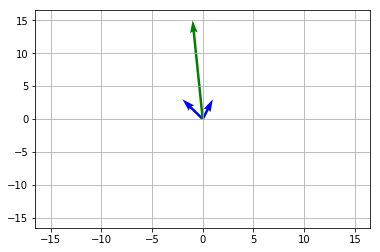

array([-1, 15])

In [182]:
x=np.array([1,3])
a = 3
y=np.array([-2,3])
b = 2


def LCV(x,a,y,b):
    if(x.shape[0] != y.shape[0]):return False
    xy=zip(x,y)
    return np.array([(a*x)+(b*y) for x,y in xy])

v = LCV(x,a,y,b)     
plotVectors2d(x,y,v,['b','b','g'],[0,0],1.1)
v

In [11]:
x = np.array([np.array([1,0,0]),
              np.array([0,1,0]),
              np.array([0,0,1])])
s = [-3,2,4]
def LCVG(x,s):
    leng = x[0].shape[0]
    sm = np.zeros(shape=leng,dtype=np.int)
    for i in range(0, x.shape[0]):
        if (x[i].shape[0]!=leng):return False
        sm = Add(sm,np.array([s[i]*p for p in x[i]]))
    return sm

LCVG(x,s)

array([-3,  2,  4])

**Dot or Inner Product**

Slice/dice example in 2nd codeblock
$$
x = \begin{pmatrix}x_{0} \\x_{1} \\x_{2} \\... \\x_{n-1}\end{pmatrix}, y = \begin{pmatrix}y_{0} \\y_{1} \\y_{2} \\... \\y_{n-1}\end{pmatrix}, dot(x, y) = \begin{pmatrix}x_{0}.y_{0} \\x_{1}.y_{1} \\x_{2}.y_{2} \\... \\x_{n-1}.y_{n-1}\end{pmatrix}
$$



In [203]:
def Dot(x,y):
    if(x.shape[0] != y.shape[0]):return False
    xy=zip(x.T,y)
    return np.sum([x*y for x,y in xy])


x=np.array([1,1,1,1])
y=np.array([2,5,-6,1])
Dot(x,y)

2

In [202]:
def DotSlice(x,y):
    if(x.shape[0] != y.shape[0]):return False
    a = 0  
    xy=zip(x.T,y)
    for x,y in xy:
        a += (x*y)        
    return a

x=np.array([1,1,1,1])
y=np.array([2,5,-6,1])
DotSlice(x,y)

2

**Vector Length (norm2)**

Note that $$ \left \| x \right \|_{2} $$ means the norm2 of x.

$$
\left \| x \right \|_{2} = \sqrt{\sum_{i=0}^{n-1}x_{i}^{2}}
$$

$$
\left \| x \right \|_{2} = \sqrt{dot(x,x)}
$$

In [13]:
x=np.array([1,-2,2])

def Norm2Length(x):
    return np.sqrt(Dot(x,x))

print(Norm2Length(x))
print(length(x))

3.0
3.0


**Taxi-cab norm (norm1)**

It is sometimes called the taxi-cab norm because it is the distance, in blocks, that a taxi would need to drive in a city like New York, where the streets are laid out like a grid.

$$
\left \| x \right \|_{1} = \sqrt{\sum_{i=0}^{n-1}x_{i}^{1}}
$$

In [210]:
x=np.array([1,2,2])

def Norm1Length(x):
    return Dot(x,np.ones(x.shape))

print(Norm1Length(x))

5.0


**Linear Transformations**

A vector function L is a linear transformation if
- You can scale first and then transform or transform first and then scale:
$$
L(ax) = aL(x)
$$
- You can transform first and then sum or sum first and then transform:
$$
L(x+y) = L(x)+L(y)
$$

**General Function vs Linear Function vs Linear Transformations**

It depends of your background how I can explain it. First I will assume you have taken high school algebra. Then I will explain if you have also taken pre-cal or calculus.

In high school algebras, functions are key. Functions take inputs each to exactly one output.. One way of describing a function is to give a rule and describe possible inputs. In high school, these inputs and outputs usually were real numbers. Now in linear algebra, the inputs and outputs can be vectors.

In high school you talked about special functions. For example, linear functions and quadratics came into play. Linear functions were very important because they had some special properties (the most important was slope ---change in y over change in x stayed the same for all pairs of inputs, s, and outputs, y. So you could determine that you were dealing with a function that was a linear function because it was in the form f(x)-mx+b ---special. Now in linear algebra, there are special vector functions called linear transformations that ate sorta extensions of the lines we ran into in algebra. They have special properties and we are going to see they are the foundations of linear algebra. This is what we start seeing in week 2. We can determine if we are dealing with a vector function that is a linear trnasformation by looking to see if it satisfies the properties that linear transformations must satisfy.

Now why are these important? Well, in calculus, you may have learned that functions can be approximated locally by linear functions. In practice when we have many quantities and have complcated vector functions, locally we approximate these using linear transformations.

Hope this helps.